# Demo: AI-Forecast

> Below is a quick demonstration of how we can do forecasting using the `ai-models-X` available from the ECMWF organization.


### **Tid-Bits**

---

**`cfgrib`-Backend**

Need to install the `cfgrib` engine. More information can be found [here](https://github.com/ecmwf/cfgrib#filter-heterogeneous-grib-files).

---

**AI-Forecast Installation**

Below is script for the weather forecasting right now.

```bash
# install ai-models
pip install ai-models
# install forecast net
pip install ai-models-fourcastnetv2
# install necessary softwaqre
ai-models --download-assets fourcastnetv2-small
# example download for a specific data
ai-models --download-assets fourcastnetv2-small --input cds --date 20221019
```

---

**PLotting**

Quiver Plot Guide - [here](https://tristansalles.github.io/EnviReef/5-xarray/examples/maps.html)

Select a directory for storing the models.

```bash
```

### Import Packages

In [1]:
import os
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import cmocean
import tqdm.auto as tqdm

sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.7)

### Download (Model) Assets

This is simply downloading the weights of the model and also the normalization scheme used.
This can be used via the `--download-assets fourcastnetv2-small command`

In [2]:
model_assets = [
    "panguweather",
    "fourcastnet",
    "fourcastnetv2-small",
    "graphcast",
]

### Save Path

We can control where the path is with the following command `--assets path/to/save/loc`.

In [3]:
path_to_models = Path("/home/juanjohn/data/forecasters/ai_models")

### Lead Times

The `lead-time` command gives us the lead time in hours. 
The type is always an integer. 
We can use the `datetime.timedelta` to easily input some of our choosing and then manually convert it to hours.

In [34]:
from datetime import timedelta

lead_time = timedelta(days=10)
num_hours: int = int(lead_time.total_seconds()/60/60)
num_hours

240

### Start Time


In [35]:
start_date = "20240101"
start_time = "0000"

### Final Command

In [36]:
# for imodel in model_assets:
command = f"ai-models"
command += f" --assets {path_to_models}"
command += f" --download-assets fourcastnetv2-small"
command += f" --input cds"
command += f" --lead-time {num_hours}"
command += f" --date {start_date}"
command += f" --time {start_time}"
print(command)
# os.system(command)

ai-models --assets /home/juanjohn/data/forecasters/ai_models --download-assets fourcastnetv2-small --input cds --lead-time 240 --date 20240101 --time 0000


## Forecasting

Below, we do forecasting for 01 november, 2024.|

In [9]:
# !ai-models --download-assets fourcastnetv2-small --input cds --date 20231101

In [39]:
ds = xr.open_dataset("./fourcastnetv2-small.grib", engine="cfgrib")

Ignoring index file './fourcastnetv2-small.grib.923a8.idx' older than GRIB file
skipping variable: paramId==228246 shortName='u100'
Traceback (most recent call last):
  File "/home/juanjohn/miniconda/envs/ai-models/lib/python3.10/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/juanjohn/miniconda/envs/ai-models/lib/python3.10/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=100.0)
skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "/home/juanjohn/miniconda/envs/ai-models/lib/python3.10/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/juanjohn/miniconda/envs/ai-models/lib/python3.10/si

In [40]:
ds

<xarray.Dataset>
Dimensions:            (step: 40, latitude: 721, longitude: 1440,
                        isobaricInhPa: 13)
Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 0 days 06:00:00 ... 10 days 00:...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time         (step) datetime64[ns] ...
    surface            float64 ...
    meanSea            float64 ...
    entireAtmosphere   float64 ...
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
Data variables:
    u10                (step, latitude, longitude) float32 ...
    v10                (step, latitude, longitude) float32 ...
    sp                 (step, latitude, longitude) float32 ...
    msl                (step, latitude, longitude) float32 ...
    tcwv               (step, latitude, longitude) float32 ...
    u                  (step, isobaricInhPa, latitude, longitude) float32 ...
    v                  (step, isobaricInhPa, latitude, longitude) float32 ...
    z                  (step, isobaricInhPa, latitude, longitude) float32 ...
    t                  (step, isobaricInhPa, latitude, longitude) float32 ...
    r                  (step, isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-01-29T12:51 GRIB to CDM+CF via cfgrib-0.9.1...

### Dataset Size

In [80]:
n_mbytes = ds.isel(step=0).nbytes / (1024 * 1024)
print(f"DataArray.size in MB: {n_mbytes:_.2f}")
# adding batches
batch_size = 64
print(f"DataArray.size in MB + Batchsize: {32 * n_mbytes:_.2f}")

DataArray.size in MB: 277.26
DataArray.size in MB + Batchsize: 8_872.21


In [41]:
import lexcube 

In [42]:
step = 0
isobaricInhPa = 0
cbar_kwargs = {
    "fraction": 0.027, 
    "pad": 0.045, 
    "orientation": "horizontal"
}


w = lexcube.Cube3DWidget(ds.t.isel(isobaricInhPa=isobaricInhPa), cmap="thermal_r", vmin=-20, vmax=30)
w

Xarray input object does not have chunks. You can re-open with 'chunks={}' to enable dask for caching and progress reporting functionality - but may be overall slower for small data sets.


Cube3DWidget(api_metadata={'/api': {'status': 'ok', 'api_version': 5}, '/api/datasets': [{'id': 'default', 'sh…

## Movie

In [43]:
from xmovie import Movie

In [44]:
def plot_pcolormesh_temperature(ds, fig, tt, *args, **kwargs):

    fig.set_size_inches(10,7)
    ax = fig.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    
    isobaricInhPa = 0
    cbar_kwargs = {
        "fraction": 0.027, 
        "pad": 0.045, 
        "orientation": "horizontal"
    }
    ds.isel(step=tt, isobaricInhPa=isobaricInhPa).plot.pcolormesh(ax=ax, cmap="RdBu_r", transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.1, color='k', alpha=1, 
                      linestyle='--')
    
    ax.coastlines(linewidth=1)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8} 
    
    plt.tight_layout()
    return None, None

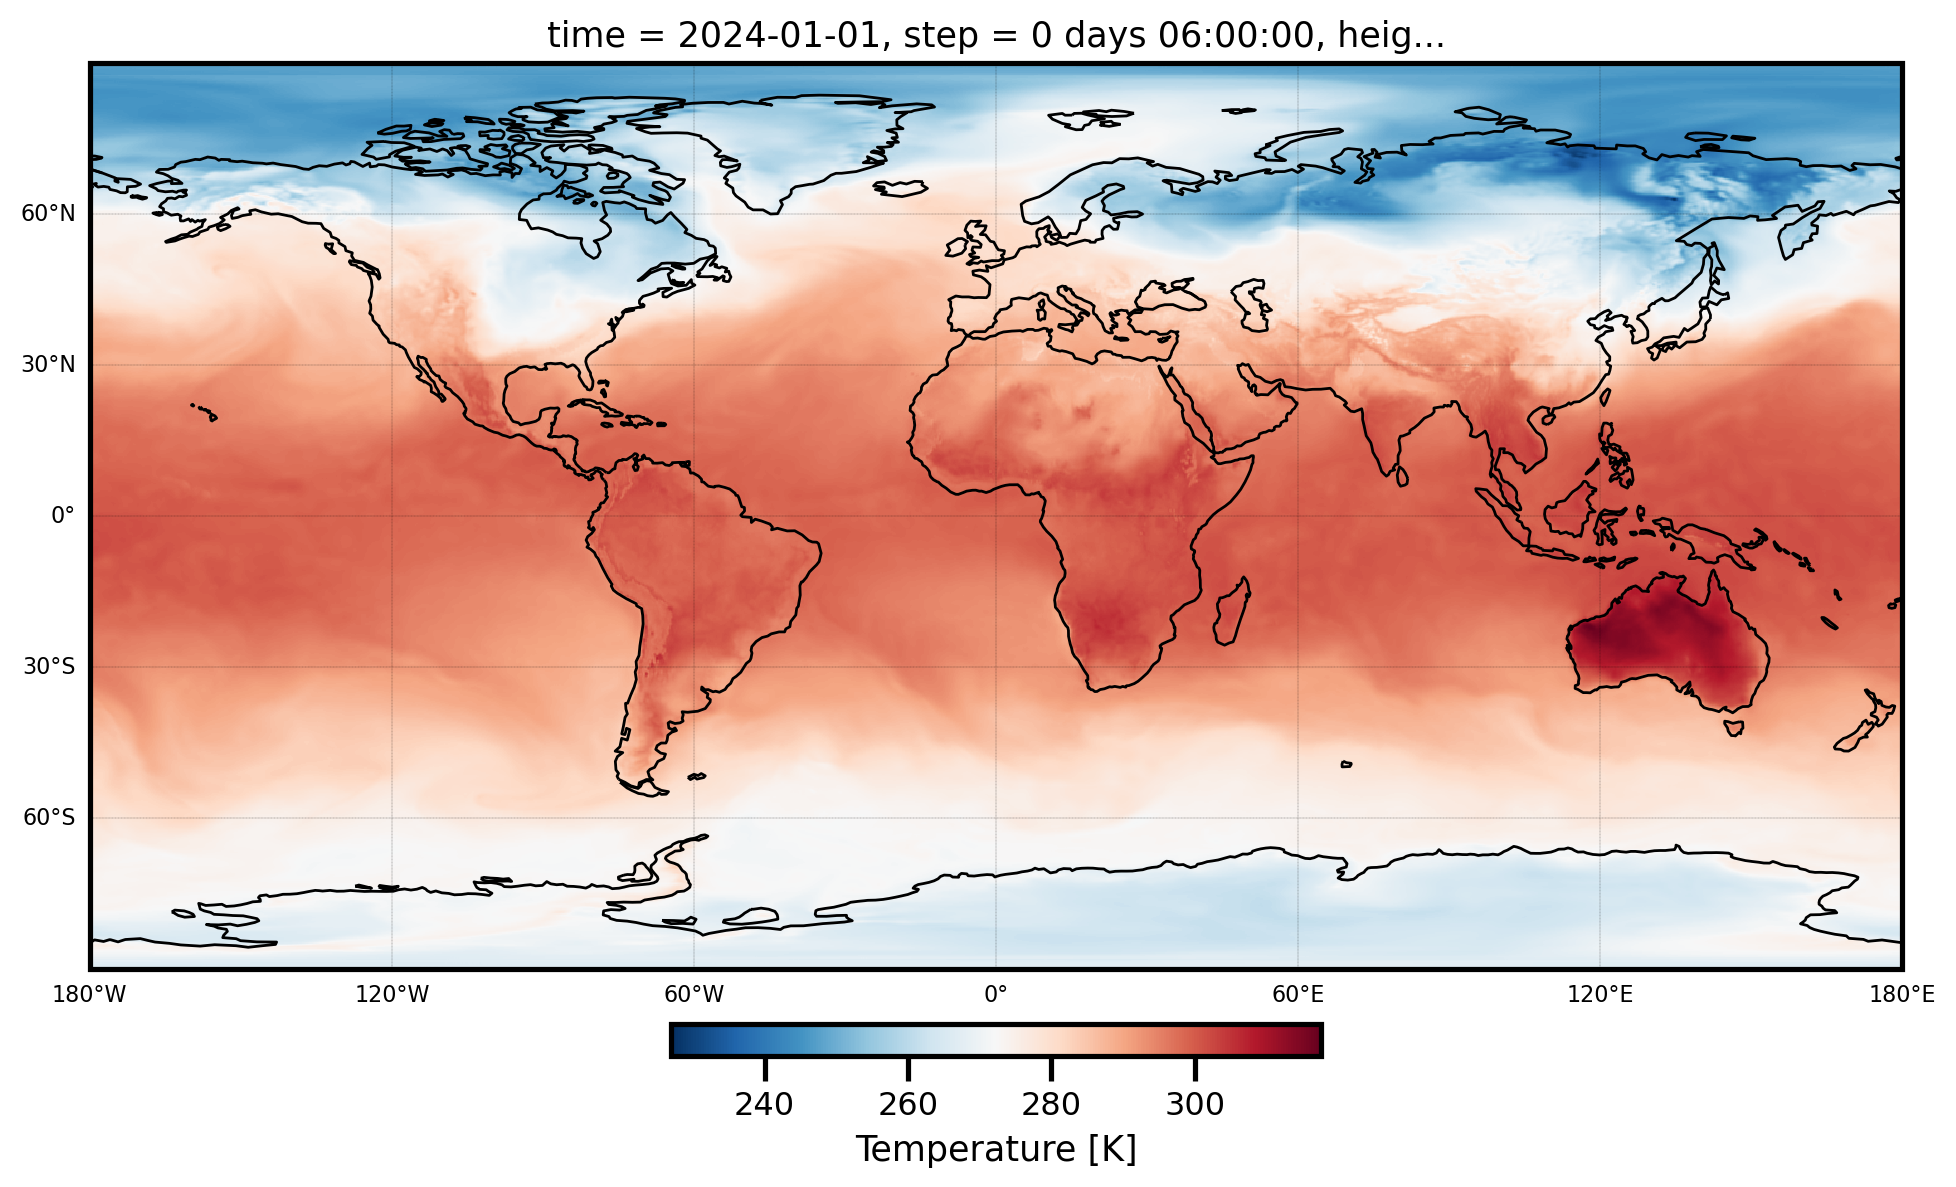

In [45]:
%matplotlib inline
mov = Movie(
    ds.t,
    plotfunc=plot_pcolormesh_temperature,
    framedim="step",
    input_check=False,
)
mov.preview(0)

In [46]:
# def plot_fn(ds, fig, tt, *args, **kwargs):
#     ds = ds.isel(time=tt)
#     _ = plot_pcolormesh(ds)

def create_movie(
    var,
    name,
    plotfunc,
    framedim: str = "steps",
    file_path=None,
    **kwargs,
):
    if file_path is not None:
        file_name = Path(file_path).joinpath(f"movie_{name}.gif")
    else:
        file_name = Path(f"./movie_{name}.gif")

    mov = Movie(
        var, plotfunc=plotfunc, framedim=framedim, **kwargs, dpi=200, input_check=False
    )
    mov.save(
        file_name,
        remove_movie=False,
        progress=True,
        framerate=1,
        gif_framerate=1,
        overwrite_existing=True,
        gif_resolution_factor=0.5,
        parallel=False,
    )

    return None

In [47]:
create_movie(
    ds.t,
    name=f"temperature_lvl0",
    plotfunc=plot_pcolormesh_temperature,
    file_path="./",
    framedim="step",
    robust=True,
)

  0%|          | 0/40 [00:00<?, ?it/s]

Movie created at movie_temperature_lvl0.mp4
GIF created at movie_temperature_lvl0.gif


![](./movie_temperature_lvl0.gif)

## Wind Speed

In [60]:
def plot_pcolormesh_windspeed(ds, fig, tt, *args, **kwargs):

    fig.set_size_inches(10,7)
    ax = fig.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    
    isobaricInhPa = 0
    cbar_kwargs = {
        "fraction": 0.027, 
        "pad": 0.045, 
        "orientation": "horizontal",
        "label": "Wind Speed (Magnitude) [ms$^{-2}$]",
    }
    
    
    mag = np.sqrt(ds.u.isel(step=tt, isobaricInhPa=isobaricInhPa)**2 + ds.v.isel(step=step, isobaricInhPa=isobaricInhPa)**2)
    mag.plot.pcolormesh(ax=ax, cmap=cmocean.cm.speed, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.1, color='k', alpha=1, 
                      linestyle='--')
    
    
    # QUIVER PLOTS
    resample = ds[["u","v"]].isel(step=tt,longitude=slice(None, None, 20), latitude=slice(None, None, 20), isobaricInhPa=isobaricInhPa)
    resample.plot.quiver(ax=ax, x='longitude', y='latitude', u='u', v='v', transform=ccrs.PlateCarree(), )
    
    ax.coastlines(linewidth=1)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12} 
    
    plt.tight_layout()
    return None, None

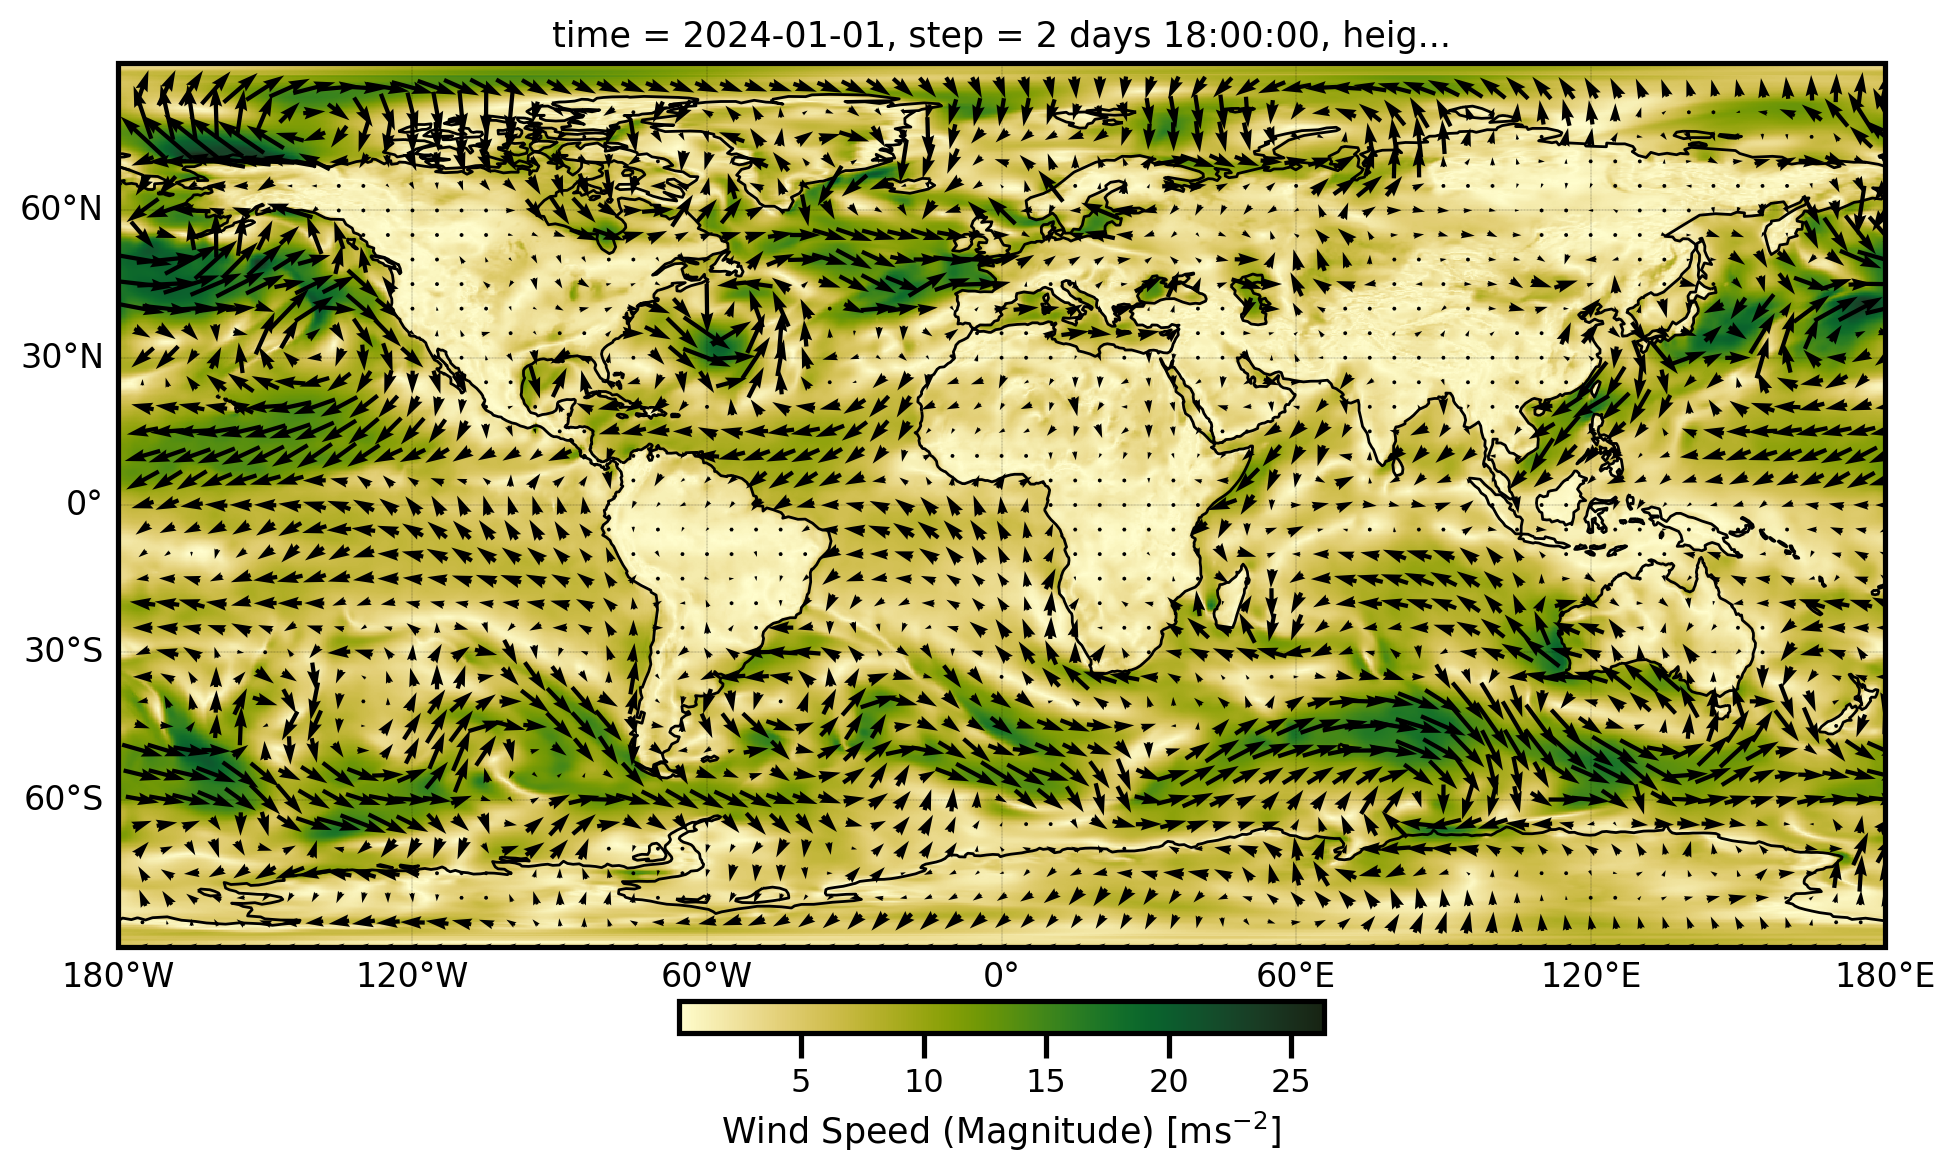

In [62]:
%matplotlib inline
mov = Movie(
    ds,
    plotfunc=plot_pcolormesh_windspeed,
    framedim="step",
    input_check=False,
)
mov.preview(10)

In [63]:
create_movie(
    ds,
    name=f"windspeed_lvl0",
    plotfunc=plot_pcolormesh_windspeed,
    file_path="./",
    framedim="step",
    robust=True,
)

  0%|          | 0/40 [00:00<?, ?it/s]

Movie created at movie_windspeed_lvl0.mp4
GIF created at movie_windspeed_lvl0.gif


## Mean Sea Level Pressure

In [66]:
def plot_pcolormesh_msl(ds, fig, tt, *args, **kwargs):

    fig.set_size_inches(10,7)
    ax = fig.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    
    isobaricInhPa = 0
    cbar_kwargs = {
        "fraction": 0.027, 
        "pad": 0.045, 
        "orientation": "horizontal"
    }
    ds.msl.isel(step=tt).plot.pcolormesh(ax=ax, cmap="RdBu_r", transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.1, color='k', alpha=1, 
                      linestyle='--')
    
    ax.coastlines(linewidth=1)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8} 
    
    plt.tight_layout()
    return None, None

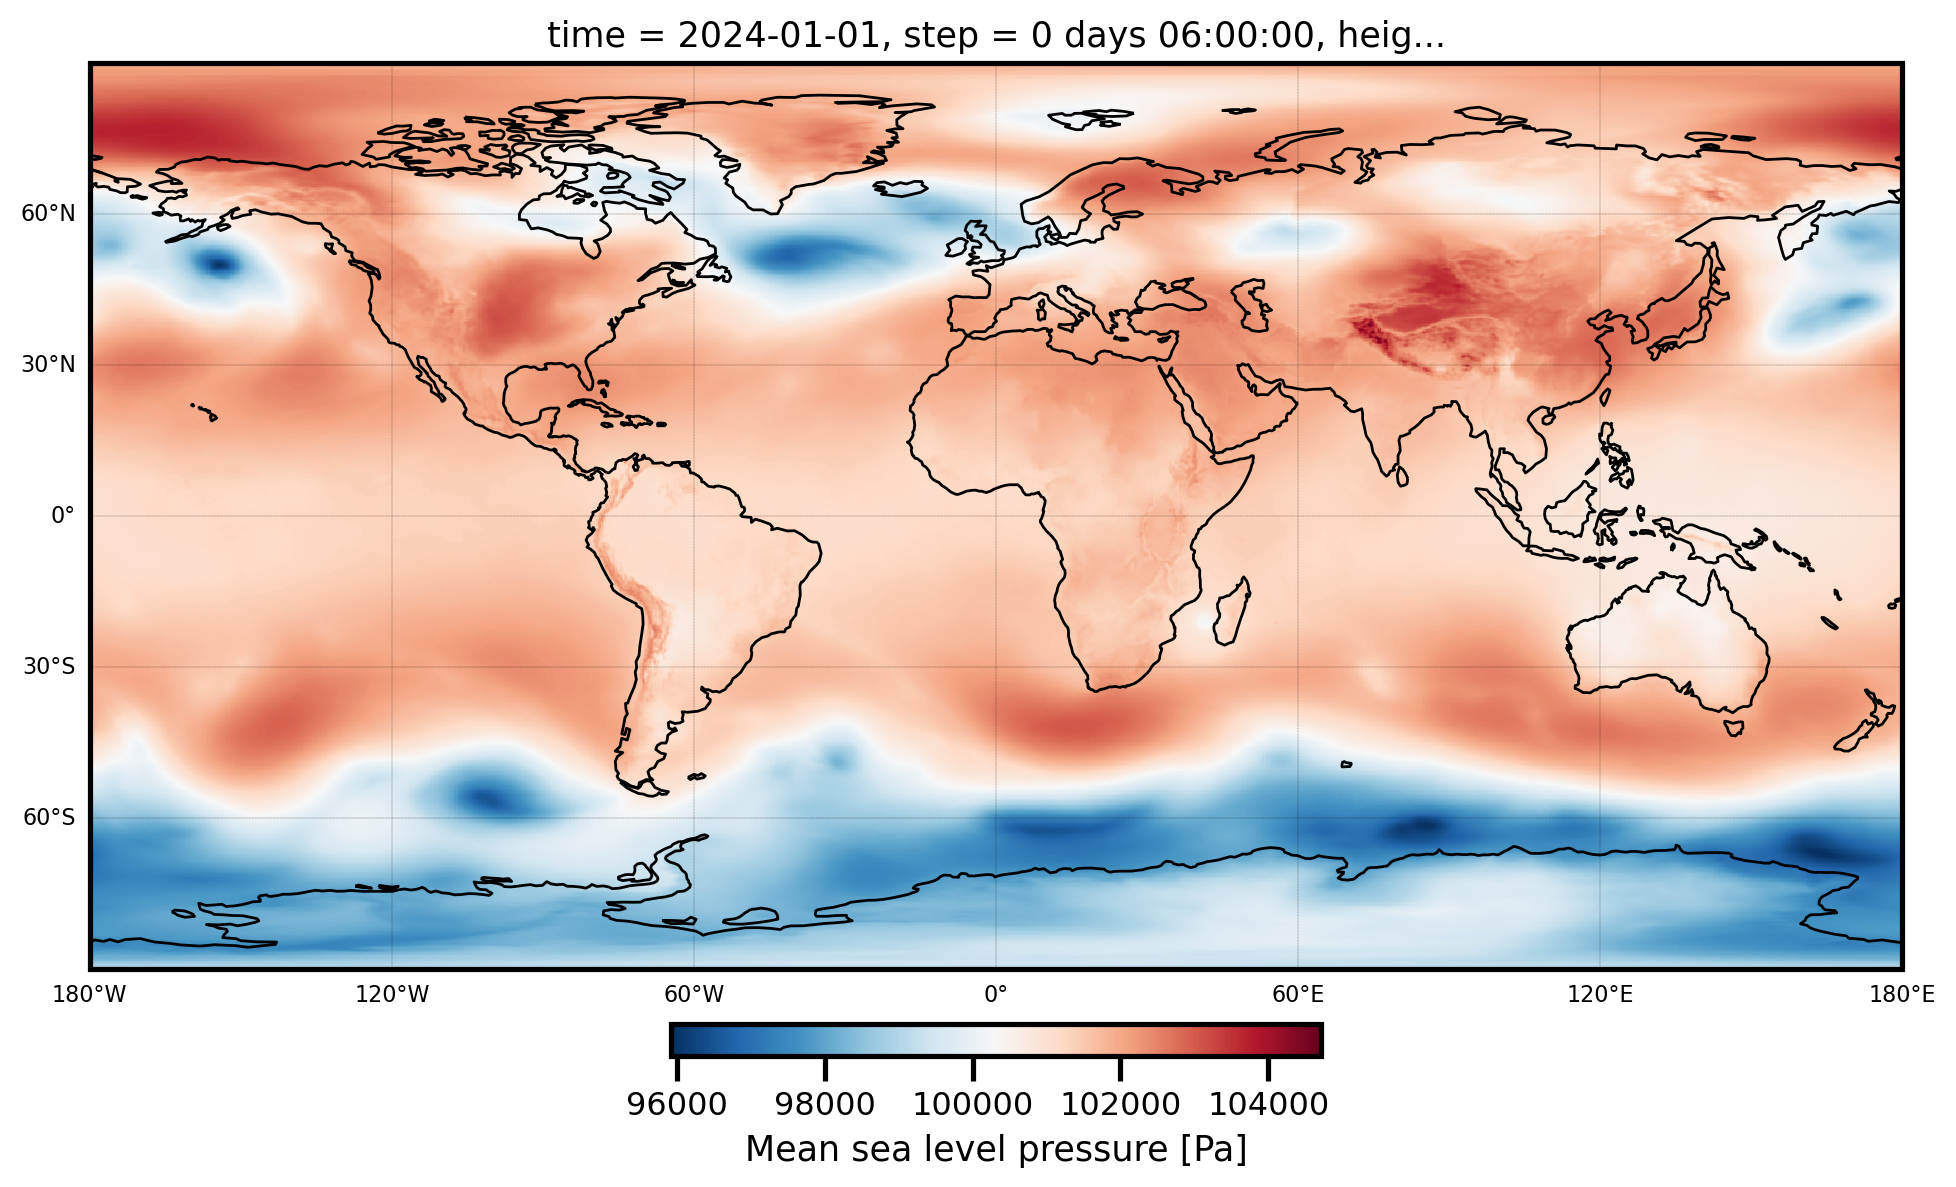

In [67]:
%matplotlib inline
mov = Movie(
    ds,
    plotfunc=plot_pcolormesh_msl,
    framedim="step",
    input_check=False,
)
mov.preview(0)

In [68]:
create_movie(
    ds,
    name=f"msl_lvl0",
    plotfunc=plot_pcolormesh_msl,
    file_path="./",
    framedim="step",
    robust=True,
)

  0%|          | 0/40 [00:00<?, ?it/s]

Movie created at movie_msl_lvl0.mp4
GIF created at movie_msl_lvl0.gif
